## Exploratory Data Analysis (EDA)
#### 1.Data exploration
#### 2.Data Cleaning 
#### 3.Data Visualizing 
#### 4.Data transformation

### 1.Data exploration

In [60]:
# import needed libraries
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV

from sklearn.metrics import confusion_matrix,precision_recall_curve, f1_score, roc_curve
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support, roc_curve, auc,accuracy_score

In [3]:
Data=pd.read_csv('/kaggle/input/postpartum-depression/post natal data.csv')
Data.head()

,Timestamp,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling anxious,Feeling of guilt,Problems of bonding with baby,Suicide attempt
0,6/14/2022 20:02,35-40,Yes,Yes,Two or more days a week,Yes,Yes,Yes,No,Yes,Yes
1,6/14/2022 20:03,40-45,Yes,No,No,Yes,Yes,No,Yes,Yes,No
2,6/14/2022 20:04,35-40,Yes,No,Yes,Yes,Yes,Yes,No,Sometimes,No
3,6/14/2022 20:05,35-40,Yes,Yes,Yes,Yes,No,Yes,Maybe,No,No
4,6/14/2022 20:06,40-45,Yes,No,Two or more days a week,Yes,No,Yes,No,Yes,No


In [4]:
Data.columns

Index(['Timestamp', 'Age', 'Feeling sad or Tearful',
       'Irritable towards baby & partner', 'Trouble sleeping at night',
       'Problems concentrating or making decision',
       'Overeating or loss of appetite', 'Feeling anxious', 'Feeling of guilt',
       'Problems of bonding with baby', 'Suicide attempt'],
      dtype='object')

In [5]:
Data.drop('Timestamp',axis=1,inplace=True)
Data.columns

Index(['Age', 'Feeling sad or Tearful', 'Irritable towards baby & partner',
       'Trouble sleeping at night',
       'Problems concentrating or making decision',
       'Overeating or loss of appetite', 'Feeling anxious', 'Feeling of guilt',
       'Problems of bonding with baby', 'Suicide attempt'],
      dtype='object')

In [6]:
Data.rename(columns = {'Feeling anxious':'Anxious','Feeling of guilt':'Guilt','Feeling sad or Tearful':'Feeling sad/Tearful','Trouble sleeping at night':'Trouble sleeping'}, inplace = True)
Data.columns

Index(['Age', 'Feeling sad/Tearful', 'Irritable towards baby & partner',
       'Trouble sleeping', 'Problems concentrating or making decision',
       'Overeating or loss of appetite', 'Anxious', 'Guilt',
       'Problems of bonding with baby', 'Suicide attempt'],
      dtype='object')

In [7]:
li=list(Data.columns)
for i in li:
    print(Data[i].value_counts())
    print('----------------------')

Age
40-45    364
35-40    349
30-35    338
45-50    271
25-30    181
Name: count, dtype: int64
----------------------
Feeling sad/Tearful
Yes          536
No           524
Sometimes    443
Name: count, dtype: int64
----------------------
Irritable towards baby & partner
Yes          555
No           499
Sometimes    443
Name: count, dtype: int64
----------------------
Trouble sleeping
Two or more days a week    640
Yes                        445
No                         418
Name: count, dtype: int64
----------------------
Problems concentrating or making decision
No       583
Often    473
Yes      435
Name: count, dtype: int64
----------------------
Overeating or loss of appetite
No            841
Yes           343
Not at all    319
Name: count, dtype: int64
----------------------
Anxious
Yes    980
No     523
Name: count, dtype: int64
----------------------
Guilt
No       624
Maybe    528
Yes      342
Name: count, dtype: int64
----------------------
Problems of bonding with baby
No 

In [8]:
print("DataSet contain:\n{0} rows \n{1} columns".format(Data.shape[0],Data.shape[1]))

DataSet contain:
1503 rows 
10 columns


In [9]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 10 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Age                                        1503 non-null   object
 1   Feeling sad/Tearful                        1503 non-null   object
 2   Irritable towards baby & partner           1497 non-null   object
 3   Trouble sleeping                           1503 non-null   object
 4   Problems concentrating or making decision  1491 non-null   object
 5   Overeating or loss of appetite             1503 non-null   object
 6   Anxious                                    1503 non-null   object
 7   Guilt                                      1494 non-null   object
 8   Problems of bonding with baby              1503 non-null   object
 9   Suicide attempt                            1503 non-null   object
dtypes: object(10)
memory usage: 117.6+ K

In [10]:
Data.describe()

,Age,Feeling sad/Tearful,Irritable towards baby & partner,Trouble sleeping,Problems concentrating or making decision,Overeating or loss of appetite,Anxious,Guilt,Problems of bonding with baby,Suicide attempt
count,1503,1503,1497,1503,1491,1503,1503,1494,1503,1503
unique,5,3,3,3,3,3,2,3,3,3
top,40-45,Yes,Yes,Two or more days a week,No,No,Yes,No,No,No
freq,364,536,555,640,583,841,980,624,557,709


### 2. Data Cleaning 

In [11]:
# Look for missing values 
Data.isna().sum()

Age                                           0
Feeling sad/Tearful                           0
Irritable towards baby & partner              6
Trouble sleeping                              0
Problems concentrating or making decision    12
Overeating or loss of appetite                0
Anxious                                       0
Guilt                                         9
Problems of bonding with baby                 0
Suicide attempt                               0
dtype: int64

In [12]:
Data['Irritable towards baby & partner'].value_counts().idxmax()

'Yes'

In [13]:
Data['Irritable towards baby & partner'].replace(np.nan,Data['Irritable towards baby & partner'].value_counts().idxmax(),inplace=True)
Data['Problems concentrating or making decision'].replace(np.nan,Data['Problems concentrating or making decision'].value_counts().idxmax(),inplace=True)
Data['Guilt'].replace(np.nan,Data['Guilt'].value_counts().idxmax(),inplace=True)

Data.isna().sum()

/tmp/ipykernel_37/1465412190.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Data['Irritable towards baby & partner'].replace(np.nan,Data['Irritable towards baby & partner'].value_counts().idxmax(),inplace=True)
/tmp/ipykernel_37/1465412190.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav

Age                                          0
Feeling sad/Tearful                          0
Irritable towards baby & partner             0
Trouble sleeping                             0
Problems concentrating or making decision    0
Overeating or loss of appetite               0
Anxious                                      0
Guilt                                        0
Problems of bonding with baby                0
Suicide attempt                              0
dtype: int64

In [14]:
# target values
Data['Suicide attempt'].unique()

array(['Yes', 'No', 'Not interested to say'], dtype=object)

In [15]:
# drop 'Not interested to say', we want binary classification
Data.drop(Data[Data['Suicide attempt'] == "Not interested to say"].index, inplace = True)
Data['Suicide attempt'].unique()

array(['Yes', 'No'], dtype=object)

### 3.Data Visualizing 

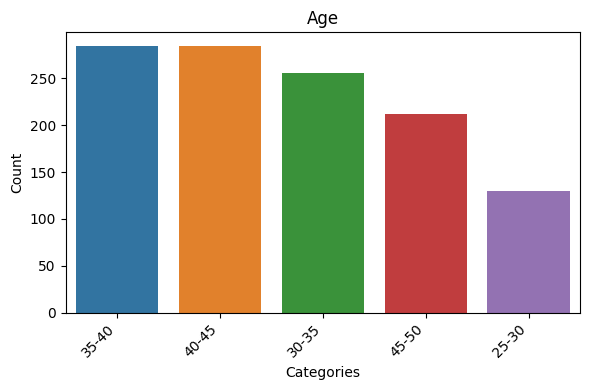

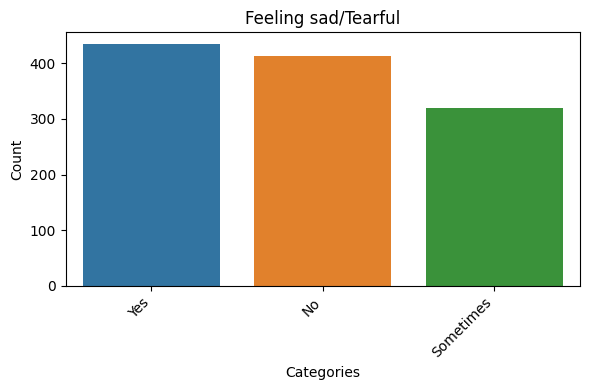

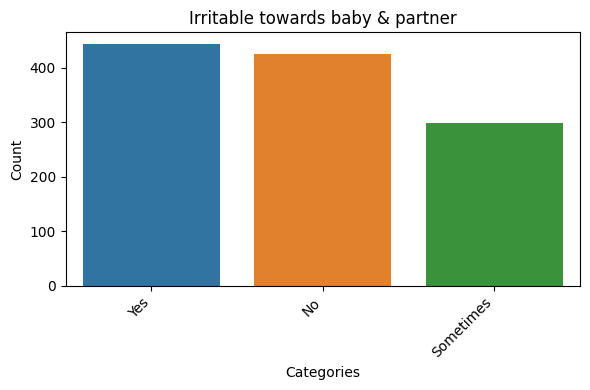

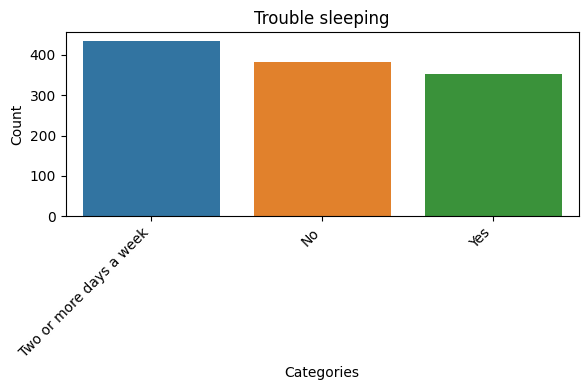

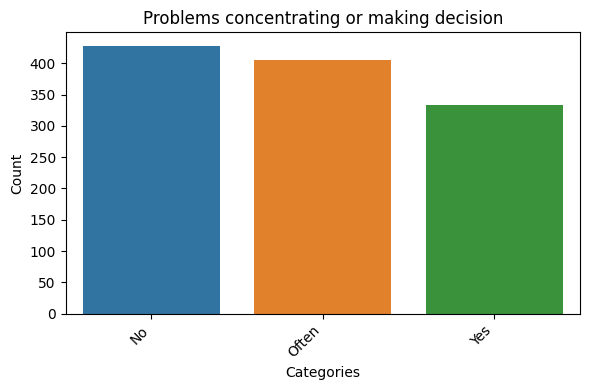

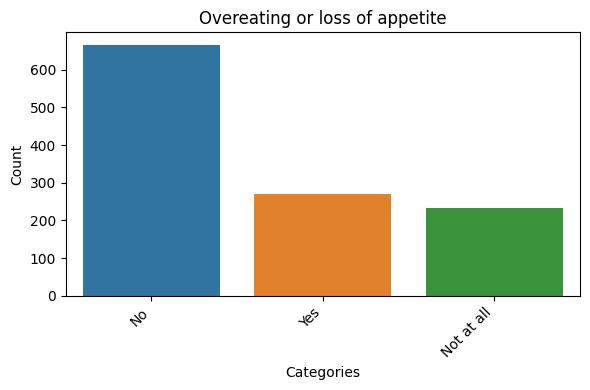

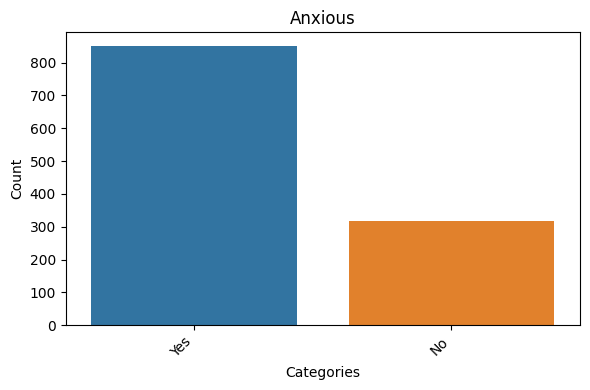

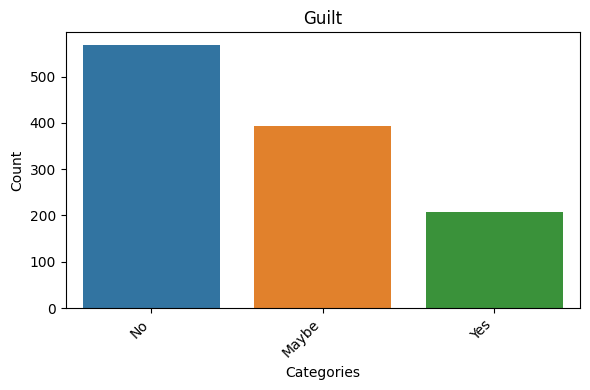

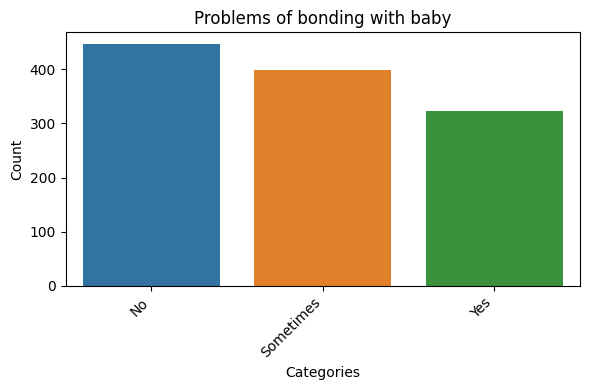

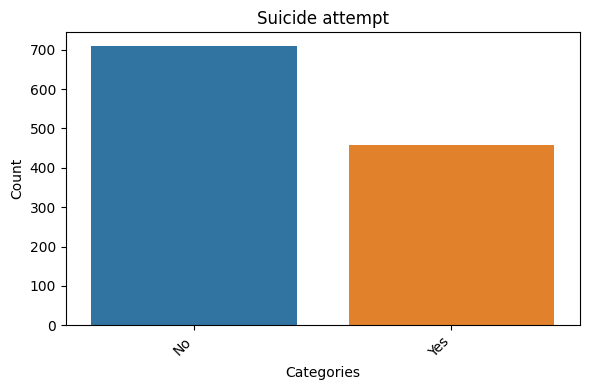

In [16]:
for i in Data.columns:
    if Data[i].dtype == 'object':
        plt.figure(figsize=(6,4))
        a = Data[i].value_counts()
        sns.barplot(x=a.index, y=a.values)
        plt.title(i)
        plt.xlabel('Categories')
        plt.ylabel('Count')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

<Figure size 600x400 with 0 Axes>

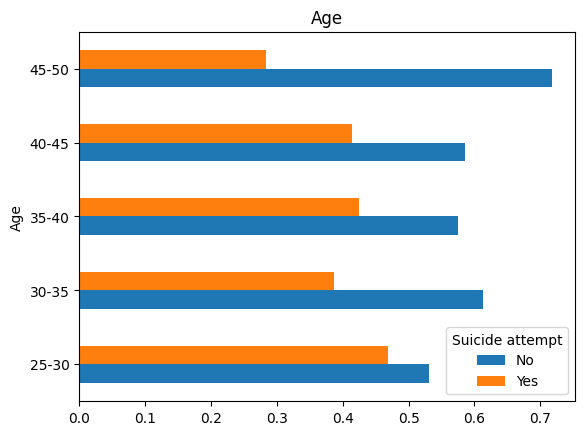

<Figure size 600x400 with 0 Axes>

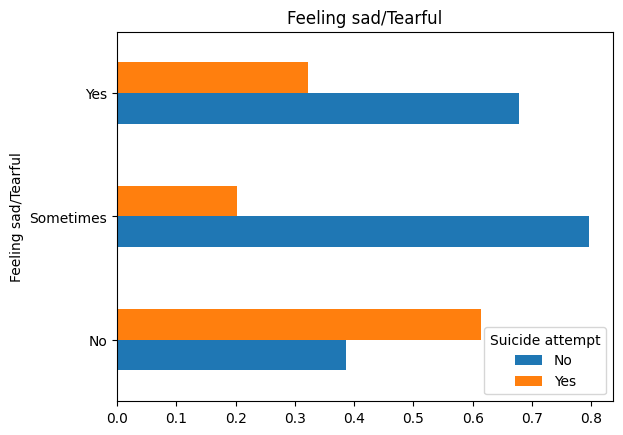

<Figure size 600x400 with 0 Axes>

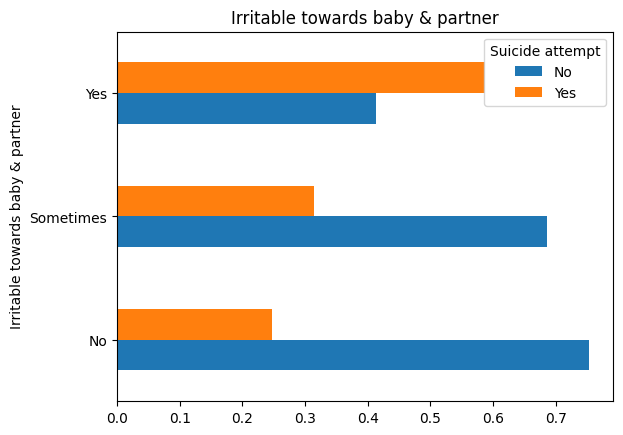

<Figure size 600x400 with 0 Axes>

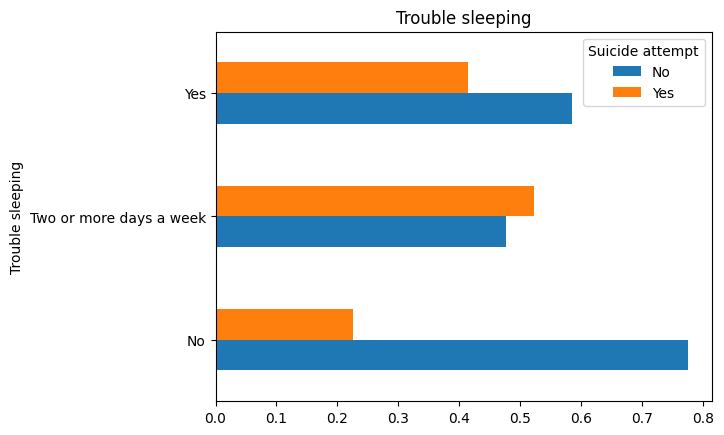

<Figure size 600x400 with 0 Axes>

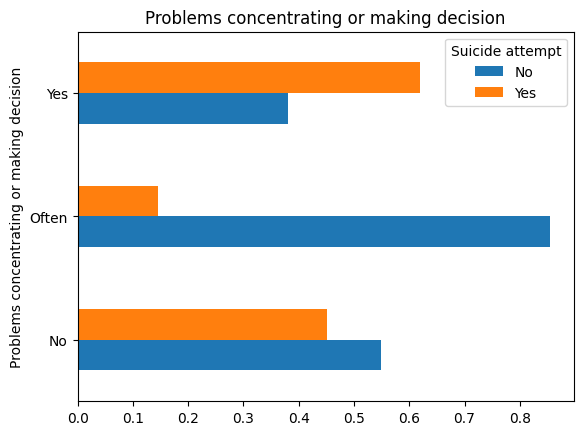

<Figure size 600x400 with 0 Axes>

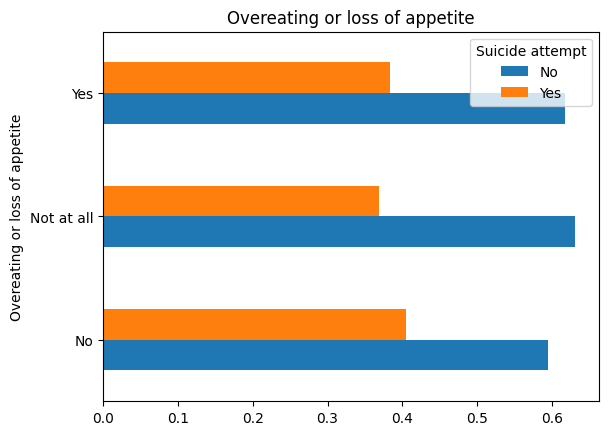

<Figure size 600x400 with 0 Axes>

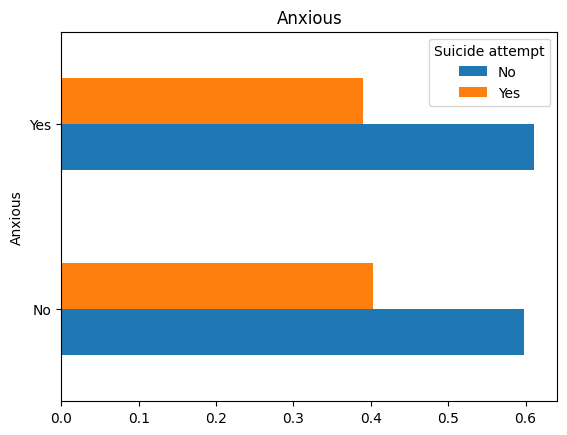

<Figure size 600x400 with 0 Axes>

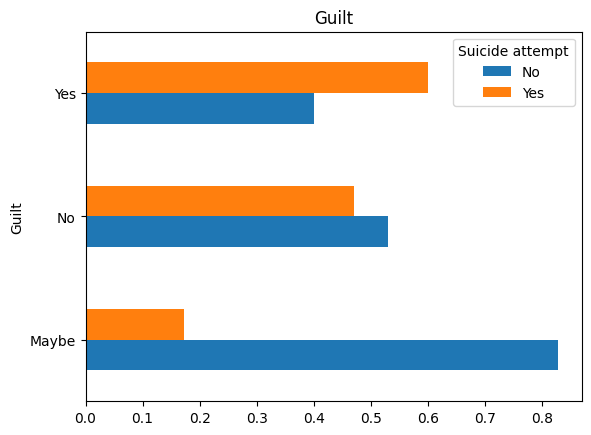

<Figure size 600x400 with 0 Axes>

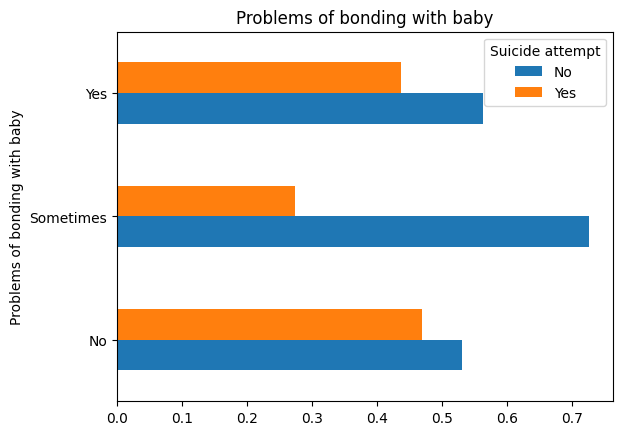

In [17]:
for i in Data.columns:#Feature Correlations
    if i != 'Suicide attempt':
        plt.figure(figsize=(6,4))
        a = Data.groupby(i)['Suicide attempt'].value_counts(normalize=True)
        a.unstack().plot(kind='barh') 
        plt.title(i)
        plt.show()

### 4.Data transformation

In [18]:
Data['Suicide attempt'] = Data['Suicide attempt'].replace({'Yes': 1, 'No': 0})
Data.head()

/tmp/ipykernel_37/2007411406.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Data['Suicide attempt'] = Data['Suicide attempt'].replace({'Yes': 1, 'No': 0})


,Age,Feeling sad/Tearful,Irritable towards baby & partner,Trouble sleeping,Problems concentrating or making decision,Overeating or loss of appetite,Anxious,Guilt,Problems of bonding with baby,Suicide attempt
0,35-40,Yes,Yes,Two or more days a week,Yes,Yes,Yes,No,Yes,1
1,40-45,Yes,No,No,Yes,Yes,No,Yes,Yes,0
2,35-40,Yes,No,Yes,Yes,Yes,Yes,No,Sometimes,0
3,35-40,Yes,Yes,Yes,Yes,No,Yes,Maybe,No,0
4,40-45,Yes,No,Two or more days a week,Yes,No,Yes,No,Yes,0


In [19]:
X = Data.iloc[:, :-1]
y = Data.loc[:, 'Suicide attempt']
X.head()


,Age,Feeling sad/Tearful,Irritable towards baby & partner,Trouble sleeping,Problems concentrating or making decision,Overeating or loss of appetite,Anxious,Guilt,Problems of bonding with baby
0,35-40,Yes,Yes,Two or more days a week,Yes,Yes,Yes,No,Yes
1,40-45,Yes,No,No,Yes,Yes,No,Yes,Yes
2,35-40,Yes,No,Yes,Yes,Yes,Yes,No,Sometimes
3,35-40,Yes,Yes,Yes,Yes,No,Yes,Maybe,No
4,40-45,Yes,No,Two or more days a week,Yes,No,Yes,No,Yes


In [20]:
y.head()

0    1
1    0
2    0
3    0
4    0
Name: Suicide attempt, dtype: int64

In [21]:
# Using make_column_transformer to One-Hot Encode
ohe=OneHotEncoder()
column_transformer = make_column_transformer((ohe, ['Age', 'Feeling sad/Tearful', 'Irritable towards baby & partner',
       'Trouble sleeping', 'Problems concentrating or making decision',
       'Overeating or loss of appetite', 'Anxious', 'Guilt',
       'Problems of bonding with baby']), remainder='passthrough')
X_transformed = column_transformer.fit_transform(X)
X_transformed = pd.DataFrame(data=X_transformed)

In [22]:
X_transformed.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


## Models


#### 1. Splitting Data 


In [23]:
X_train, X_test, y_train, y_test=train_test_split(X_transformed,y,test_size=0.20,random_state =42,stratify=y)

### DecisionTree

In [49]:
clf = DecisionTreeClassifier(criterion="entropy",  max_depth=5, min_samples_leaf=8,
                       min_samples_split=2)

clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

print("Accuracy:",accuracy_score(y_test, y_pred))


Accuracy: 0.8418803418803419


<Axes: >

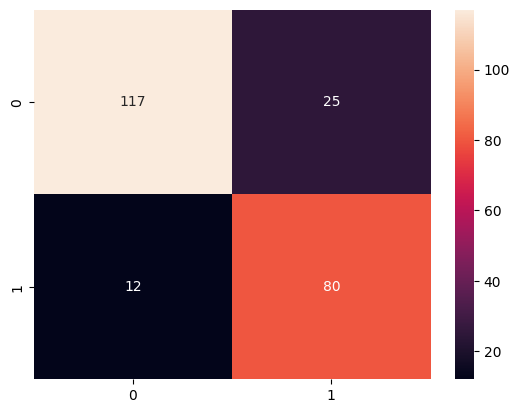

In [51]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d')

In [52]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.82      0.86       142
           1       0.76      0.87      0.81        92

    accuracy                           0.84       234
   macro avg       0.83      0.85      0.84       234
weighted avg       0.85      0.84      0.84       234



In [53]:
cv_DT=cross_val_score(clf, X_transformed, y, cv=5,scoring='f1')
print("F1:",cv_DT)
print("Average F1 accuracy across all 5 folds for DT : {:.2f}".format(cv_DT.mean()))

precision, recall, f1_score,_= precision_recall_fscore_support(y_test, y_pred)
print(f"F-score for testing data: {f1_score[1]:.2f}")
print(f"Recall: {recall[1]:.2f}")
print(f"Precision: {precision[1]:.2f}\n")

F1: [0.63157895 0.78431373 0.76190476 0.85869565 0.9726776 ]
Average F1 accuracy across all 5 folds for DT : 0.80
F-score for testing data: 0.81
Recall: 0.87
Precision: 0.76



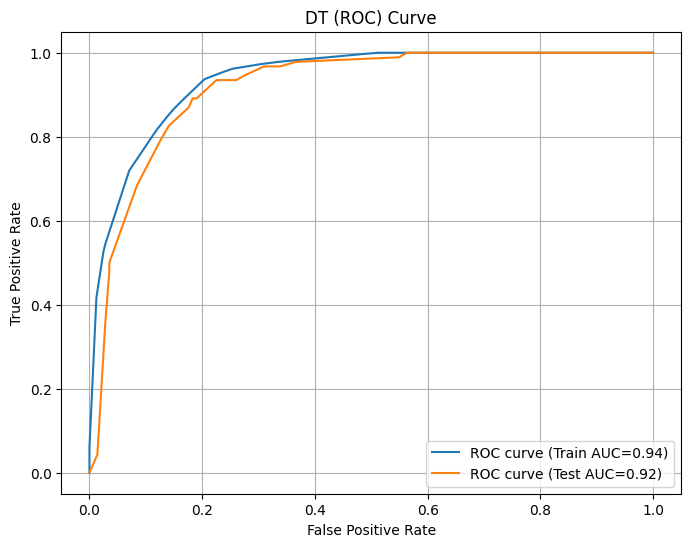

In [54]:
y_train_predpr = clf.predict_proba(X_train)[:, 1]
y_test_predpr = clf.predict_proba(X_test)[:, 1]
# ROC curve/score
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_predpr)
roc_auc_train = auc(fpr_train, tpr_train)

fpr_test, tpr_test, _ = roc_curve(y_test, y_test_predpr)
roc_auc_test = auc(fpr_test, tpr_test)
# Plot ROC curve


plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f'ROC curve (Train AUC={roc_auc_train:.2f})')
plt.plot(fpr_test, tpr_test, label=f'ROC curve (Test AUC={roc_auc_test:.2f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('DT (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()

### SVM

In [55]:
SVM= SVC(C=3 ,kernel='rbf', gamma='scale',probability=True)
SVM.fit(X_train, y_train)
y_pred_SVM= SVM.predict(X_test)

print("Accuracy:",accuracy_score(y_test, y_pred_SVM))


Accuracy: 0.9743589743589743


<Axes: >

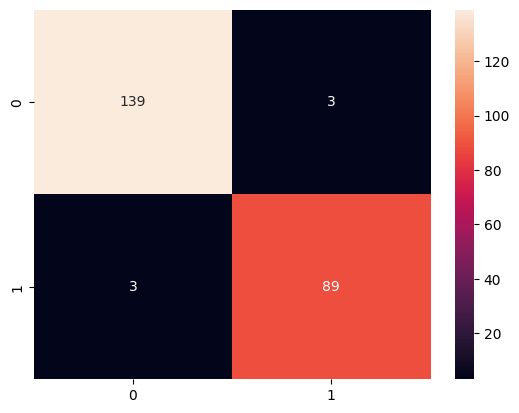

In [56]:
cm=confusion_matrix(y_test,y_pred_SVM)
sns.heatmap(cm,annot=True,fmt='d')

In [57]:
print(classification_report(y_test, y_pred_SVM))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       142
           1       0.97      0.97      0.97        92

    accuracy                           0.97       234
   macro avg       0.97      0.97      0.97       234
weighted avg       0.97      0.97      0.97       234



In [58]:
cv_SVM=cross_val_score(SVM, X_transformed, y, cv=5,scoring='f1')
print("F1:",cv_SVM)
print("Average F1 accuracy across all 5 folds for SVM : {:.2f}".format(cv_SVM.mean()))

precision, recall, f1_score,_= precision_recall_fscore_support(y_test, y_pred_SVM)
print(f"F-score for testing data: {f1_score[1]:.2f}")
print(f"Recall: {recall[1]:.2f}")
print(f"Precision: {precision[1]:.2f}\n")

F1: [0.98378378 0.98378378 1.         1.         1.        ]
Average F1 accuracy across all 5 folds for SVM : 0.99
F-score for testing data: 0.97
Recall: 0.97
Precision: 0.97



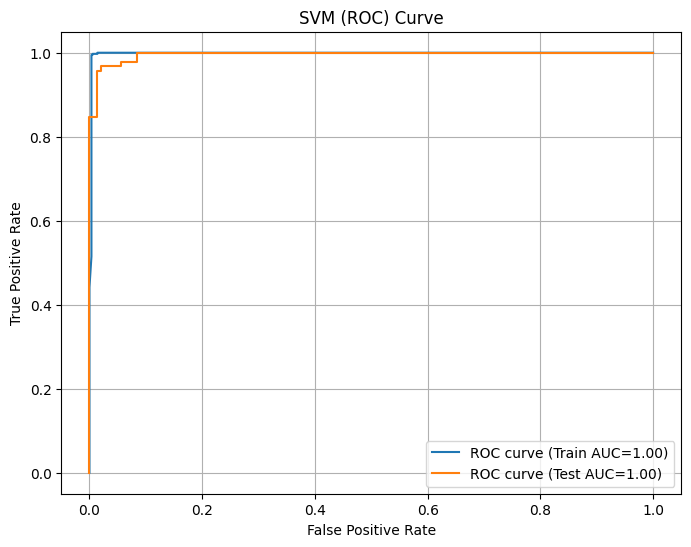

In [59]:
y_train_predprSVM = SVM.predict_proba(X_train)[:, 1]
y_test_predprSVM = SVM.predict_proba(X_test)[:, 1]
# ROC curve/score
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_predprSVM)
roc_auc_train = auc(fpr_train, tpr_train)

fpr_test, tpr_test, _ = roc_curve(y_test, y_test_predprSVM)
roc_auc_test = auc(fpr_test, tpr_test)
# Plot ROC curve


plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f'ROC curve (Train AUC={roc_auc_train:.2f})')
plt.plot(fpr_test, tpr_test, label=f'ROC curve (Test AUC={roc_auc_test:.2f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()

### Hyperparameter Tuning for DT


In [66]:
param_grid=[{'criterion':["gini", "entropy"],
             'max_depth':[1,3,5,7 ],
             'min_samples_leaf':[2,4,6,8 ],
             'min_samples_split':[4,6,8,10]
            }]
Dt_tu=DecisionTreeClassifier()
DT_CV_Tun=GridSearchCV(Dt_tu,param_grid,cv=5)
DT_CV_Tun.fit(X_transformed,y)
print("Best Parameters:",DT_CV_Tun.best_params_)
print("Best Score:",DT_CV_Tun.best_score_)

Best Parameters: {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 4}
Best Score: 0.9101940501082131


Accuracy: 0.8760683760683761
F1: [0.7607362  0.86       0.88764045 0.92307692 0.97237569]
Average F1 accuracy across all 5 folds for DT : 0.88
F-score for testing data: 0.84
Recall: 0.85
Precision: 0.84



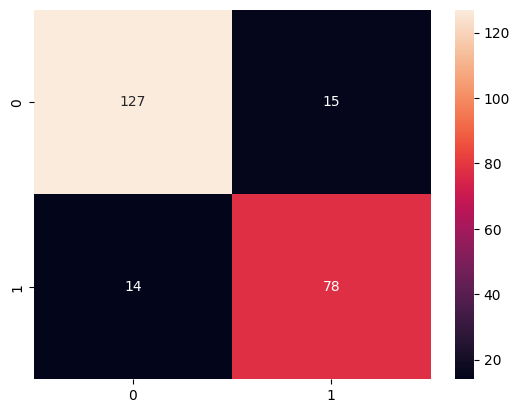

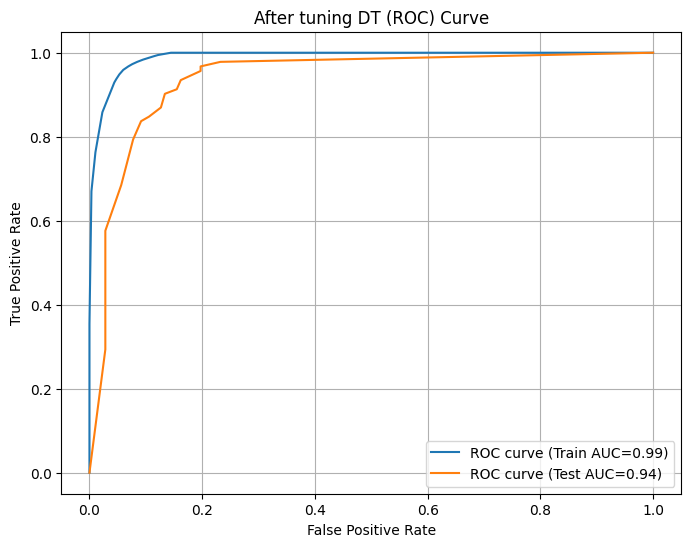

In [67]:
clf = DecisionTreeClassifier(criterion="gini",  max_depth=7, min_samples_leaf=2,
                       min_samples_split=4)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)


print("Accuracy:",accuracy_score(y_test, y_pred))
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d')
cv_DT=cross_val_score(clf, X_transformed, y, cv=5,scoring='f1')
print("F1:",cv_DT)
print("Average F1 accuracy across all 5 folds for DT : {:.2f}".format(cv_DT.mean()))

precision, recall, f1_score,_= precision_recall_fscore_support(y_test, y_pred)
print(f"F-score for testing data: {f1_score[1]:.2f}")
print(f"Recall: {recall[1]:.2f}")
print(f"Precision: {precision[1]:.2f}\n")

y_train_predpr = clf.predict_proba(X_train)[:, 1]
y_test_predpr = clf.predict_proba(X_test)[:, 1]
# ROC curve/score
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_predpr)
roc_auc_train = auc(fpr_train, tpr_train)

fpr_test, tpr_test, _ = roc_curve(y_test, y_test_predpr)
roc_auc_test = auc(fpr_test, tpr_test)
# Plot ROC curve


plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f'ROC curve (Train AUC={roc_auc_train:.2f})')
plt.plot(fpr_test, tpr_test, label=f'ROC curve (Test AUC={roc_auc_test:.2f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('After tuning DT (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()